**Note**: I installed Anderson's `refactor` branch that is currently an open PR before running this.

`pip install git+https://github.com/andersy005/intake-esm.git@refactor --upgrade`

In [1]:
%matplotlib inline

import intake
import warnings
import xarray as xr

warnings.filterwarnings("ignore")

Note that the new command is `open_esm_datastore`, not `open_esm_metadatastore`

In [2]:
col = intake.open_esm_datastore("/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cmip6.json")

In [3]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,day,pr,gn,NaN,v20190702,20150101-20551231,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,hfls,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,prsn,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,va,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,tas,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...


In [4]:
col

glade-cmip6-ESM Collection with 687919 entries:
	> 12 activity_id(s)

	> 24 institution_id(s)

	> 47 source_id(s)

	> 66 experiment_id(s)

	> 162 member_id(s)

	> 35 table_id(s)

	> 1027 variable_id(s)

	> 12 grid_label(s)

	> 59 dcpp_init_year(s)

	> 246 version(s)

	> 6667 time_range(s)

	> 687919 path(s)

In [5]:
uniques = col.unique(columns=["activity_id", "source_id", "grid_label", "experiment_id", "table_id"])

In [6]:
import pprint
pprint.pprint(uniques)

{'activity_id': {'count': 12,
                 'values': ['AerChemMIP',
                            'C4MIP',
                            'CFMIP',
                            'CMIP',
                            'DAMIP',
                            'DCPP',
                            'HighResMIP',
                            'LS3MIP',
                            'LUMIP',
                            'OMIP',
                            'PAMIP',
                            'ScenarioMIP']},
 'experiment_id': {'count': 66,
                   'values': ['ssp370',
                              'histSST-piNTCF',
                              'histSST',
                              'histSST-1950HC',
                              'hist-1950HC',
                              'hist-piNTCF',
                              'piClim-NTCF',
                              'ssp370SST-lowNTCF',
                              'ssp370-lowNTCF',
                              'ssp370SST',
                        

Pulling in DCPP output. Just a single initialization.

In [7]:
cat = col.search(member_id=['r7i1p2f1', 'r2i1p2f1', 'r8i1p2f1', 'r10i1p2f1'],
                 experiment_id='dcppC-hindcast-noElChichon')
dsets = cat.to_dataset_dict(cdf_kwargs={"chunks": {"time": 36}})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


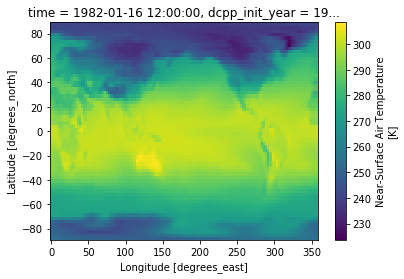

In [8]:
dsets['DCPP.CCCma.CanESM5.dcppC-hindcast-noElChichon.Amon.gn'].tas.squeeze().isel(time=0, member_id=0).plot()

Pulling in a more complex array here. This tests out grabbing the assimilation runs.

In [9]:
cat = col.search(experiment_id="dcppA-assim", institution_id='MIROC',)

In [10]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
563787,DCPP,MIROC,MIROC6,dcppA-assim,r2i1p1f1,Omon,tos,gn,NaN,v20190821,195001-201712,/glade/collections/cmip/CMIP6/DCPP/MIROC/MIROC...
563788,DCPP,MIROC,MIROC6,dcppA-assim,r1i1p1f1,Omon,tos,gn,NaN,v20190821,195001-201712,/glade/collections/cmip/CMIP6/DCPP/MIROC/MIROC...
563789,DCPP,MIROC,MIROC6,dcppA-assim,r3i1p1f1,Omon,tos,gn,NaN,v20190821,195001-201712,/glade/collections/cmip/CMIP6/DCPP/MIROC/MIROC...
563790,DCPP,MIROC,MIROC6,dcppA-assim,r9i1p1f1,Omon,tos,gn,NaN,v20190821,195001-201712,/glade/collections/cmip/CMIP6/DCPP/MIROC/MIROC...
563791,DCPP,MIROC,MIROC6,dcppA-assim,r8i1p1f1,Omon,tos,gn,NaN,v20190821,195001-201712,/glade/collections/cmip/CMIP6/DCPP/MIROC/MIROC...
563792,DCPP,MIROC,MIROC6,dcppA-assim,r10i1p1f1,Omon,tos,gn,NaN,v20190821,195001-201712,/glade/collections/cmip/CMIP6/DCPP/MIROC/MIROC...
563793,DCPP,MIROC,MIROC6,dcppA-assim,r7i1p1f1,Omon,tos,gn,NaN,v20190821,195001-201712,/glade/collections/cmip/CMIP6/DCPP/MIROC/MIROC...
563794,DCPP,MIROC,MIROC6,dcppA-assim,r6i1p1f1,Omon,tos,gn,NaN,v20190821,195001-201712,/glade/collections/cmip/CMIP6/DCPP/MIROC/MIROC...


In [11]:
dsets = cat.to_dataset_dict(cdf_kwargs={"chunks": {"time": 36}})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


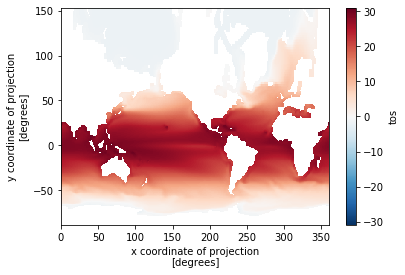

In [12]:
# Ensemble mean over 1970-2000. Cool.
dsets['DCPP.MIROC.MIROC6.dcppA-assim.Omon.gn']['tos'].mean('member_id').sel(time=slice('1970', '2000')).mean('time').plot()

Now pulling in an initialized hindcast subset.

In [13]:
cat = col.search(experiment_id="dcppA-hindcast", table_id='Amon', member_id=['r1i1p2f1', 'r2i1p2f1'])

In [14]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
562105,DCPP,CCCma,CanESM5,dcppA-hindcast,r2i1p2f1,Amon,tas,gn,1977.0,v20190429,197801-198712,/glade/collections/cmip/CMIP6/DCPP/CCCma/CanES...
562125,DCPP,CCCma,CanESM5,dcppA-hindcast,r2i1p2f1,Amon,tas,gn,1993.0,v20190429,199401-200312,/glade/collections/cmip/CMIP6/DCPP/CCCma/CanES...
562149,DCPP,CCCma,CanESM5,dcppA-hindcast,r2i1p2f1,Amon,tas,gn,1971.0,v20190429,197201-198112,/glade/collections/cmip/CMIP6/DCPP/CCCma/CanES...
562158,DCPP,CCCma,CanESM5,dcppA-hindcast,r1i1p2f1,Amon,tas,gn,2014.0,v20190429,201501-202412,/glade/collections/cmip/CMIP6/DCPP/CCCma/CanES...
562182,DCPP,CCCma,CanESM5,dcppA-hindcast,r1i1p2f1,Amon,tas,gn,1970.0,v20190429,197101-198012,/glade/collections/cmip/CMIP6/DCPP/CCCma/CanES...
...,...,...,...,...,...,...,...,...,...,...,...,...
563163,DCPP,CCCma,CanESM5,dcppA-hindcast,r2i1p2f1,Amon,tas,gn,1985.0,v20190429,198601-199512,/glade/collections/cmip/CMIP6/DCPP/CCCma/CanES...
563183,DCPP,CCCma,CanESM5,dcppA-hindcast,r2i1p2f1,Amon,tas,gn,1968.0,v20190429,196901-197812,/glade/collections/cmip/CMIP6/DCPP/CCCma/CanES...
563190,DCPP,CCCma,CanESM5,dcppA-hindcast,r2i1p2f1,Amon,tas,gn,1981.0,v20190429,198201-199112,/glade/collections/cmip/CMIP6/DCPP/CCCma/CanES...
563242,DCPP,CCCma,CanESM5,dcppA-hindcast,r1i1p2f1,Amon,tas,gn,2009.0,v20190429,201001-201912,/glade/collections/cmip/CMIP6/DCPP/CCCma/CanES...


In [15]:
dsets = cat.to_dataset_dict()


xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


In [16]:
# Constructed by intake-esm.
ds_intake = dsets['DCPP.CCCma.CanESM5.dcppA-hindcast.Amon.gn']['tas']

In [17]:
print(ds_intake)

<xarray.DataArray 'tas' (member_id: 2, dcpp_init_year: 53, time: 792, lat: 64, lon: 128)>
dask.array<concatenate, shape=(2, 53, 792, 64, 128), dtype=float32, chunksize=(1, 1, 792, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * lon             (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * time            (time) object 1961-01-16 12:00:00 ... 2026-12-16 12:00:00
  * lat             (lat) float64 -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * dcpp_init_year  (dcpp_init_year) float64 1.96e+03 1.961e+03 ... 2.016e+03
  * member_id       (member_id) <U8 'r1i1p2f1' 'r2i1p2f1'
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        ST+273.16, DCPP_table_comment: near-surface (usually, 2 m...
    units:          K
    original_name:  ST
    cell_methods:   area: time: mean
    cell_measures:  area: areacella


In [47]:
ds_intake.dcpp_init_year

<xarray.DataArray 'dcpp_init_year' (dcpp_init_year: 52)>
array([1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1985., 1986., 1987., 1988., 1990., 1991.,
       1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2002.,
       2003., 2004., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2016.])
Coordinates:
  * dcpp_init_year  (dcpp_init_year) float64 1.96e+03 1.961e+03 ... 2.016e+03

It looks like the DCPP protocol just maintains a full time array and NaNs out irrelevant time steps with regards to that initialization year. Although I don't know what's going on in this first one.

In [66]:
ds_intake.isel(dcpp_init_year=0).isel(member_id=0).isel(lat=10, lon=10).load()

<xarray.DataArray 'tas' (time: 792)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, 

In [55]:
ds_intake.isel(dcpp_init_year=10).isel(member_id=0).isel(lat=10, lon=10).load()

<xarray.DataArray 'tas' (time: 792)>
array([      nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             n

In [67]:
ds_intake.isel(dcpp_init_year=1).isel(member_id=0).isel(lat=10, lon=10).load()

<xarray.DataArray 'tas' (time: 792)>
array([      nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
       273.56302, 273.9835 , 274.1467 , 273.30307, 272.4076 , 271.5081 ,
       268.57938, 261.559  , 258.38507, 265.7932 , 270.51404, 271.89496,
       273.46994, 273.77692, 273.75455, 272.92   , 271.41745, 270.9409 ,
       264.39883, 254.72559, 253.22897, 262.75098, 268.95813, 271.27933,
       273.0033 , 273.86252, 273.25134, 272.1653 , 270.60034, 268.16006,
       263.4286 , 254.61638, 258.8349 , 265.18353, 267.622  , 270.15353,
       271.7841 , 272.697  , 272.58176, 271.32642, 266.5507 , 251.81462,
       250.63756, 252.37926, 258.97275, 264.10153, 267.46808, 270.87695,
       271.3588 , 271.52823, 271.42825, 270.61905, 261.932  , 252.29674,
       251.15244, 255.55725, 258.25177, 263.47006, 268.51047, 270.07083,
       271.3544 , 272.04547, 271.89853, 271.7122 , 270.63547, 263.27676,
       253.441

In [49]:
ds_intake.time

<xarray.DataArray 'time' (time: 792)>
array([cftime.DatetimeNoLeap(1961, 1, 16, 12, 0, 0, 0, 2, 16),
       cftime.DatetimeNoLeap(1961, 2, 15, 0, 0, 0, 0, 4, 46),
       cftime.DatetimeNoLeap(1961, 3, 16, 12, 0, 0, 0, 5, 75), ...,
       cftime.DatetimeNoLeap(2026, 10, 16, 12, 0, 0, 0, 4, 289),
       cftime.DatetimeNoLeap(2026, 11, 16, 0, 0, 0, 0, 0, 320),
       cftime.DatetimeNoLeap(2026, 12, 16, 12, 0, 0, 0, 2, 350)], dtype=object)
Coordinates:
  * time     (time) object 1961-01-16 12:00:00 ... 2026-12-16 12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

I think this is actually good news for `climpred`. Maybe it can expect a `init-lead` configuration or `init-target`. If this follows a `time` array then it should align exactly with the averages over the assimilation run.